# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

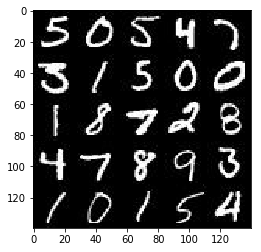

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

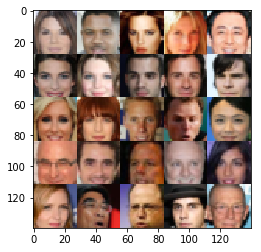

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.9.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_image = tf.placeholder(shape=[None, image_width, image_height, image_channels], dtype=tf.float32)
    noise_z = tf.placeholder(shape=[None, z_dim], dtype=tf.float32)
    learning_rate = tf.placeholder(dtype=tf.float32)

    return real_image, noise_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, is_training=False, alpha = 0.02):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    
    with tf.variable_scope("discriminator", reuse=reuse):
        # initially 28x28x3 or 28x28x1
        
        x1 = tf.layers.conv2d(images, 8, 5, (2,2), padding='same', activation=None)
        x1 = tf.maximum(alpha*x1, x1)
        #now 14x14x8
        
        x2 = tf.layers.conv2d(x1, 16, 3, (2,2), padding='same', activation=None, use_bias=False)
        x2 = tf.layers.batch_normalization(x2, axis=3, training=is_training)
        x2 = tf.maximum(alpha*x2, x2)
        #now 7x7x16
        
        x3 = tf.layers.conv2d(x2, 32, 3, (2,2), padding='same', activation=None, use_bias=False)
        x3 = tf.layers.batch_normalization(x3, axis=3, training=is_training)
        x3 = tf.maximum(alpha*x3, x3)
        #now 4x4x32
        
        x4 = tf.layers.conv2d(x3, 64, 3, (2,2), padding='same', activation=None, use_bias=False)
        x4 = tf.layers.batch_normalization(x4, axis=3, training=is_training)
        x4 = tf.maximum(alpha*x4, x4)
        #now 2x2x64
        
        x5 = tf.layers.flatten(x4)
        
        logits = tf.layers.dense(x5, 1)
        op = tf.sigmoid(logits)
        
    return (op, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.02):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    # reuse all the generator network during the image generation (No training mode) and 
    #while training there will be no need to reuse as we are training it first
    
    
    with tf.variable_scope('generator', reuse=not is_train):
        
        # initially e.g. 100 dim col vector
        g1 = tf.layers.dense(z, 3*3*128)
        g1 = tf.maximum(alpha*g1, g1)

        #print("g1", g1.get_shape().as_list())
        g1 = tf.reshape(g1, shape=[-1, 3, 3, 128])
        #print("g1-rs", g1.get_shape().as_list())
        # now 3x3x128


        g2 = tf.layers.conv2d_transpose(g1, 64, kernel_size=3, strides=(2,2), padding='valid', activation=None, use_bias=False)
        g2 = tf.layers.batch_normalization(g2, axis=3, training=is_train)
        g2 = tf.maximum(alpha*g2, alpha)
        #print("g2", g2.get_shape().as_list())
        # now 7x7x64

        g3 = tf.layers.conv2d_transpose(g2, 32, kernel_size=3, strides=(2,2), padding='same', activation=None, use_bias=False)
        g3 = tf.layers.batch_normalization(g3, axis=3, training=is_train)
        g3 = tf.maximum(alpha*g3, alpha)
        #print("g3", g3.get_shape().as_list())
        # now 14x14x32

        g4 = tf.layers.conv2d_transpose(g3, out_channel_dim, kernel_size=3, strides=(2,2), padding='same', activation=tf.nn.tanh, use_bias=True)
        #print("g4", g4.get_shape().as_list())
        # now 28x28x3

        return g4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, is_training=True):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g1 = generator(input_z, out_channel_dim, is_train=is_training, alpha=0.03)
        
    d_out_real, d_logits_real = discriminator(input_real, is_training=is_training, alpha=0.03)
    d_out_fake, d_logits_fake = discriminator(g1, is_training=is_training, alpha=0.03, reuse=True)
    
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(d_out_fake), logits=d_logits_fake))
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_out_real)*0.9, logits=d_logits_real))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(d_out_fake), logits=d_logits_fake))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):    
        d_train = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    return (d_train, g_train)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    real_image_input, noise_of_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    d_loss, g_loss = model_loss(real_image_input, noise_of_z, data_shape[3], is_training=True)
    
    d_train, g_train = model_opt(d_loss, g_loss, learn_rate, beta1)
                
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            i = 1
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                Z_val = np.random.uniform(-1, 1, size=(batch_size, z_dim))
    
                batch_images = batch_images*2
                d_run = sess.run(d_train, feed_dict={real_image_input: batch_images, noise_of_z: Z_val, learn_rate: learning_rate})
                g_run = sess.run(g_train, feed_dict={real_image_input: batch_images, noise_of_z: Z_val, learn_rate: learning_rate})
                #"""
                if i % 100 == 0:
                    disc_loss = sess.run(d_loss, feed_dict={real_image_input: batch_images, noise_of_z: Z_val})
                    gen_loss = sess.run(g_loss, feed_dict={noise_of_z: Z_val})
                    print("Batch No.: {}".format(i),
                          "Discriminator Loss: {}".format(disc_loss),
                          "Generative Loss: {}".format(gen_loss))
                i += 1
                #"""
            disc_loss = sess.run(d_loss, feed_dict={real_image_input: batch_images, noise_of_z: Z_val})
            gen_loss = sess.run(g_loss, feed_dict={noise_of_z: Z_val})
                    
            print("Epoch {}/{}".format(epoch_i+1, epoch_count),
                    "Discriminator Loss: {}".format(disc_loss),
                    "Generative Loss: {}".format(gen_loss))
            show_generator_output(sess, 20, noise_of_z, data_shape[3], data_image_mode)
            saver = tf.train.Saver()
            save_path = saver.save(sess, "/tmp/model.ckpt")
            print("Model saved in path: %s" % save_path)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Batch No.: 100 Discriminator Loss: 0.3261289596557617 Generative Loss: 9.468368530273438
Batch No.: 200 Discriminator Loss: 0.3347136974334717 Generative Loss: 6.550027847290039
Epoch 1/100 Discriminator Loss: 0.3800297677516937 Generative Loss: 6.543560028076172


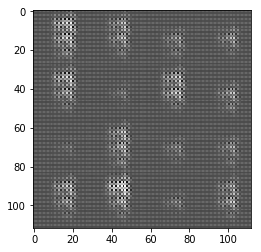

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3411900997161865 Generative Loss: 5.278611183166504
Batch No.: 200 Discriminator Loss: 0.32921209931373596 Generative Loss: 8.029105186462402
Epoch 2/100 Discriminator Loss: 0.38428691029548645 Generative Loss: 9.04266357421875


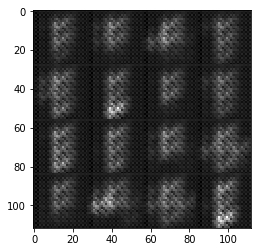

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3323386609554291 Generative Loss: 6.092159748077393
Batch No.: 200 Discriminator Loss: 0.32782235741615295 Generative Loss: 7.205260276794434
Epoch 3/100 Discriminator Loss: 0.32755082845687866 Generative Loss: 8.951778411865234


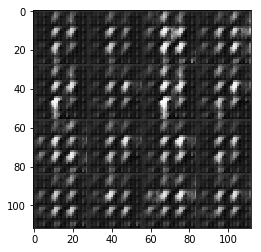

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4438171684741974 Generative Loss: 3.347393274307251
Batch No.: 200 Discriminator Loss: 0.33900362253189087 Generative Loss: 5.666584014892578
Epoch 4/100 Discriminator Loss: 0.34456607699394226 Generative Loss: 6.641638278961182


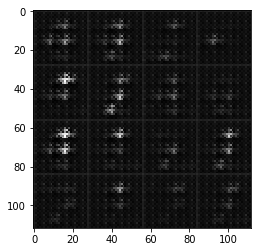

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3329482078552246 Generative Loss: 6.541321277618408
Batch No.: 200 Discriminator Loss: 0.3275813162326813 Generative Loss: 7.9677815437316895
Epoch 5/100 Discriminator Loss: 0.3291340172290802 Generative Loss: 8.841020584106445


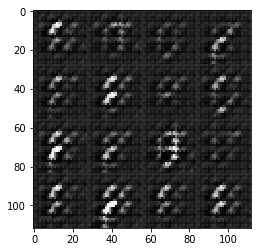

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.32810652256011963 Generative Loss: 12.381382942199707
Batch No.: 200 Discriminator Loss: 0.32998567819595337 Generative Loss: 7.479435920715332
Epoch 6/100 Discriminator Loss: 0.3381846845149994 Generative Loss: 6.02874231338501


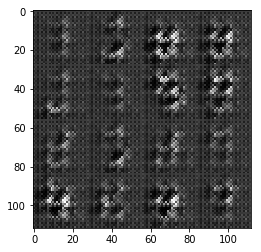

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3287084400653839 Generative Loss: 8.18732738494873
Batch No.: 200 Discriminator Loss: 0.32803457975387573 Generative Loss: 7.7114458084106445
Epoch 7/100 Discriminator Loss: 0.32839393615722656 Generative Loss: 6.544503688812256


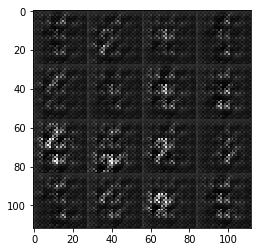

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3333333432674408 Generative Loss: 6.356962203979492
Batch No.: 200 Discriminator Loss: 0.33592480421066284 Generative Loss: 6.295623779296875
Epoch 8/100 Discriminator Loss: 0.328299343585968 Generative Loss: 8.22868537902832


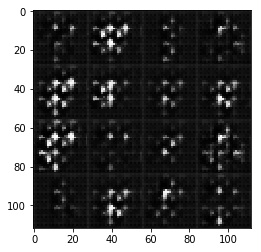

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3588050305843353 Generative Loss: 4.651585102081299
Batch No.: 200 Discriminator Loss: 0.3472655713558197 Generative Loss: 5.169941425323486
Epoch 9/100 Discriminator Loss: 0.33977752923965454 Generative Loss: 6.078049659729004


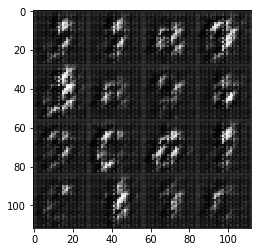

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3735899329185486 Generative Loss: 3.8144025802612305
Batch No.: 200 Discriminator Loss: 0.34166163206100464 Generative Loss: 5.133768558502197
Epoch 10/100 Discriminator Loss: 0.3487355411052704 Generative Loss: 6.59977388381958


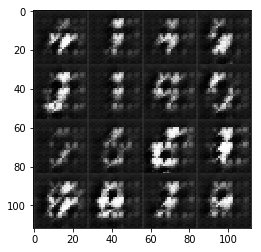

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3458222448825836 Generative Loss: 5.766177177429199
Batch No.: 200 Discriminator Loss: 0.3684627115726471 Generative Loss: 4.310423851013184
Epoch 11/100 Discriminator Loss: 0.3657124638557434 Generative Loss: 9.30141830444336


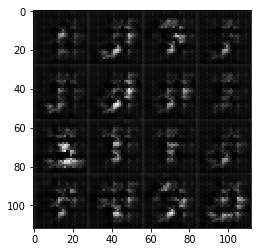

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.34943047165870667 Generative Loss: 8.62987995147705
Batch No.: 200 Discriminator Loss: 0.3668953478336334 Generative Loss: 4.849303245544434
Epoch 12/100 Discriminator Loss: 0.344630628824234 Generative Loss: 6.471916198730469


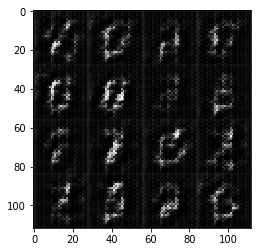

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.35287949442863464 Generative Loss: 9.477240562438965
Batch No.: 200 Discriminator Loss: 0.3525998890399933 Generative Loss: 5.364211082458496
Epoch 13/100 Discriminator Loss: 0.345377653837204 Generative Loss: 6.832324028015137


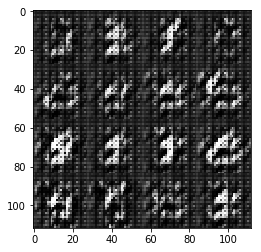

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3588654398918152 Generative Loss: 4.320152759552002
Batch No.: 200 Discriminator Loss: 0.380758136510849 Generative Loss: 7.571685791015625
Epoch 14/100 Discriminator Loss: 0.35969239473342896 Generative Loss: 4.116042613983154


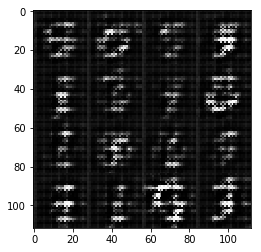

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.33189472556114197 Generative Loss: 7.566795825958252
Batch No.: 200 Discriminator Loss: 0.33542871475219727 Generative Loss: 6.783770561218262
Epoch 15/100 Discriminator Loss: 0.3326528072357178 Generative Loss: 6.316500186920166


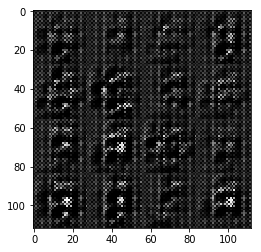

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.34651288390159607 Generative Loss: 10.020151138305664
Batch No.: 200 Discriminator Loss: 0.3409017026424408 Generative Loss: 6.398674964904785
Epoch 16/100 Discriminator Loss: 0.3537965416908264 Generative Loss: 5.80202054977417


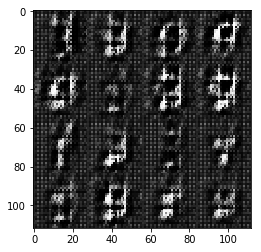

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.33970925211906433 Generative Loss: 6.8450517654418945
Batch No.: 200 Discriminator Loss: 0.33772537112236023 Generative Loss: 5.608699798583984
Epoch 17/100 Discriminator Loss: 0.33966484665870667 Generative Loss: 7.285496711730957


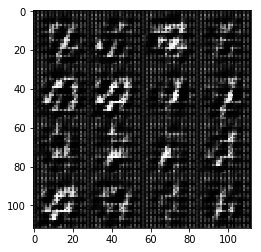

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3528902232646942 Generative Loss: 4.743094444274902
Batch No.: 200 Discriminator Loss: 0.3634616434574127 Generative Loss: 3.973081588745117
Epoch 18/100 Discriminator Loss: 0.36312761902809143 Generative Loss: 4.53135347366333


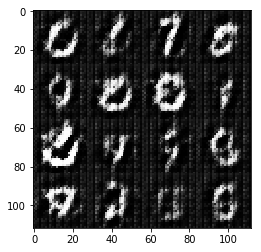

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3587396740913391 Generative Loss: 5.366064548492432
Batch No.: 200 Discriminator Loss: 0.3524353504180908 Generative Loss: 5.279841423034668
Epoch 19/100 Discriminator Loss: 0.33700793981552124 Generative Loss: 5.830448627471924


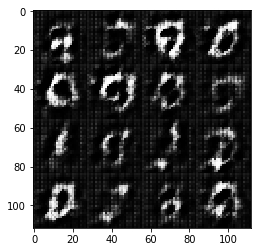

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.47287848591804504 Generative Loss: 7.982184410095215
Batch No.: 200 Discriminator Loss: 0.35667306184768677 Generative Loss: 4.914789199829102
Epoch 20/100 Discriminator Loss: 0.41234850883483887 Generative Loss: 3.995851516723633


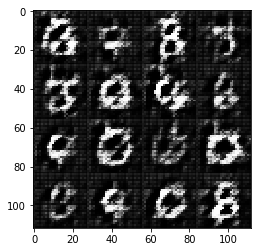

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.34622907638549805 Generative Loss: 4.7491960525512695
Batch No.: 200 Discriminator Loss: 0.3468114137649536 Generative Loss: 4.692505359649658
Epoch 21/100 Discriminator Loss: 0.33806657791137695 Generative Loss: 5.250433921813965


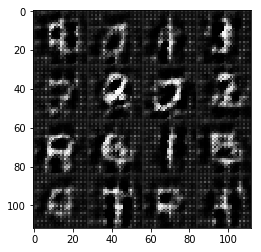

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.375340074300766 Generative Loss: 3.844355583190918
Batch No.: 200 Discriminator Loss: 0.3585551381111145 Generative Loss: 6.334771633148193
Epoch 22/100 Discriminator Loss: 0.3416177034378052 Generative Loss: 4.8176445960998535


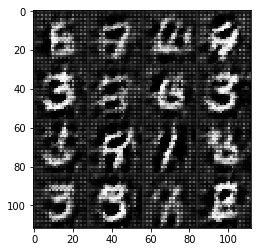

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.36661073565483093 Generative Loss: 3.6289470195770264
Batch No.: 200 Discriminator Loss: 0.3597847521305084 Generative Loss: 5.2977614402771
Epoch 23/100 Discriminator Loss: 0.4232049286365509 Generative Loss: 4.353795051574707


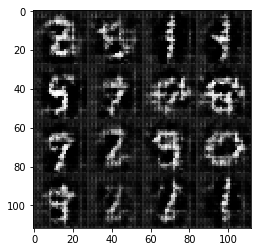

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.39013171195983887 Generative Loss: 3.4500739574432373
Batch No.: 200 Discriminator Loss: 0.4931962788105011 Generative Loss: 3.1044461727142334
Epoch 24/100 Discriminator Loss: 0.3675335943698883 Generative Loss: 4.937525749206543


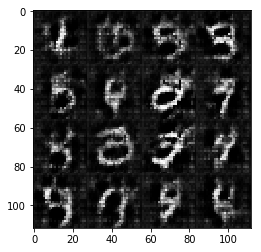

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.41872742772102356 Generative Loss: 2.7856802940368652
Batch No.: 200 Discriminator Loss: 0.3639484941959381 Generative Loss: 3.9536445140838623
Epoch 25/100 Discriminator Loss: 0.40684252977371216 Generative Loss: 6.425995826721191


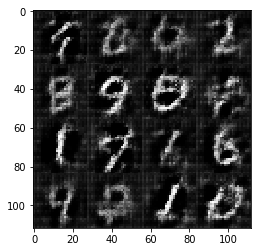

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3375653922557831 Generative Loss: 5.927562713623047
Batch No.: 200 Discriminator Loss: 0.42400699853897095 Generative Loss: 3.2871737480163574
Epoch 26/100 Discriminator Loss: 0.36716145277023315 Generative Loss: 5.034211158752441


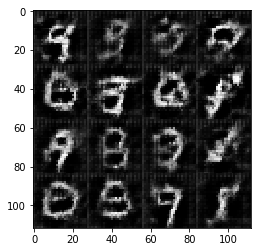

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3638392686843872 Generative Loss: 3.7835843563079834
Batch No.: 200 Discriminator Loss: 0.3753494620323181 Generative Loss: 3.4865059852600098
Epoch 27/100 Discriminator Loss: 0.35347697138786316 Generative Loss: 4.728983402252197


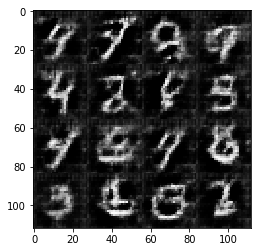

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3649246394634247 Generative Loss: 4.4607038497924805
Batch No.: 200 Discriminator Loss: 0.35511353611946106 Generative Loss: 4.372792720794678
Epoch 28/100 Discriminator Loss: 0.3757096529006958 Generative Loss: 4.487553596496582


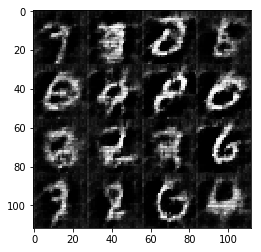

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.39689701795578003 Generative Loss: 4.648984432220459
Batch No.: 200 Discriminator Loss: 0.37169376015663147 Generative Loss: 3.5170037746429443
Epoch 29/100 Discriminator Loss: 0.46067893505096436 Generative Loss: 5.798003196716309


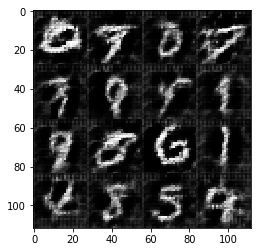

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.373628169298172 Generative Loss: 4.7364654541015625
Batch No.: 200 Discriminator Loss: 0.3899714946746826 Generative Loss: 4.145445346832275
Epoch 30/100 Discriminator Loss: 0.3589681386947632 Generative Loss: 4.465083599090576


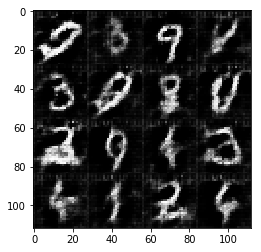

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4159727096557617 Generative Loss: 5.042459011077881
Batch No.: 200 Discriminator Loss: 0.3735271990299225 Generative Loss: 3.754977226257324
Epoch 31/100 Discriminator Loss: 0.3508705794811249 Generative Loss: 4.664727210998535


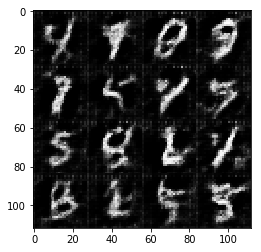

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3823840022087097 Generative Loss: 4.472671031951904
Batch No.: 200 Discriminator Loss: 0.3653477430343628 Generative Loss: 3.703695774078369
Epoch 32/100 Discriminator Loss: 0.469824880361557 Generative Loss: 5.289068222045898


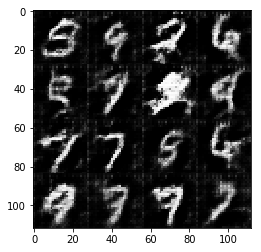

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3761132061481476 Generative Loss: 4.153049468994141
Batch No.: 200 Discriminator Loss: 0.3847734332084656 Generative Loss: 3.4012551307678223
Epoch 33/100 Discriminator Loss: 0.3559286296367645 Generative Loss: 4.149392127990723


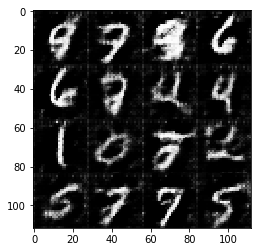

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3742220401763916 Generative Loss: 3.4440670013427734
Batch No.: 200 Discriminator Loss: 0.3914834260940552 Generative Loss: 3.185150384902954
Epoch 34/100 Discriminator Loss: 0.37121129035949707 Generative Loss: 3.6524581909179688


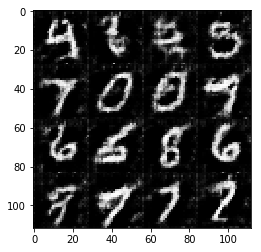

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.43875569105148315 Generative Loss: 4.2423248291015625
Batch No.: 200 Discriminator Loss: 0.36847665905952454 Generative Loss: 3.859401226043701
Epoch 35/100 Discriminator Loss: 0.4676317870616913 Generative Loss: 5.4181413650512695


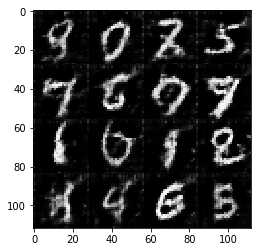

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.38666483759880066 Generative Loss: 4.300862789154053
Batch No.: 200 Discriminator Loss: 0.3818073272705078 Generative Loss: 3.9823803901672363
Epoch 36/100 Discriminator Loss: 0.37252116203308105 Generative Loss: 3.575741767883301


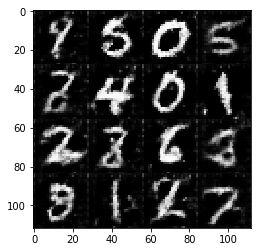

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.36547186970710754 Generative Loss: 4.0475053787231445
Batch No.: 200 Discriminator Loss: 0.40587151050567627 Generative Loss: 5.156229019165039
Epoch 37/100 Discriminator Loss: 0.40426748991012573 Generative Loss: 2.8999180793762207


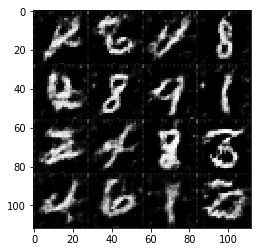

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3854086995124817 Generative Loss: 3.1383657455444336
Batch No.: 200 Discriminator Loss: 0.6332137584686279 Generative Loss: 4.264954090118408
Epoch 38/100 Discriminator Loss: 0.4398137331008911 Generative Loss: 2.7175047397613525


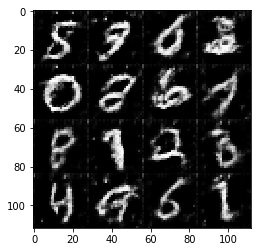

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.37957513332366943 Generative Loss: 3.3312783241271973
Batch No.: 200 Discriminator Loss: 0.412243127822876 Generative Loss: 2.784599781036377
Epoch 39/100 Discriminator Loss: 0.38995248079299927 Generative Loss: 3.470608949661255


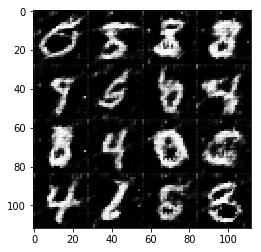

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4132632911205292 Generative Loss: 2.982435941696167
Batch No.: 200 Discriminator Loss: 0.38912874460220337 Generative Loss: 3.050649881362915
Epoch 40/100 Discriminator Loss: 0.3745957612991333 Generative Loss: 4.431764602661133


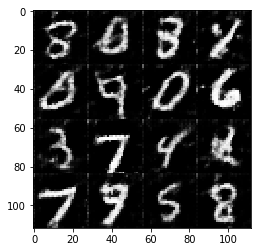

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3924673795700073 Generative Loss: 2.9772934913635254
Batch No.: 200 Discriminator Loss: 0.5338299870491028 Generative Loss: 3.508526086807251
Epoch 41/100 Discriminator Loss: 0.4782698452472687 Generative Loss: 5.324660301208496


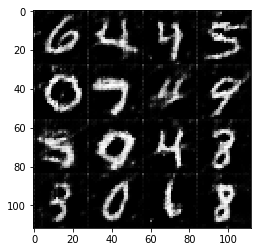

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.42465174198150635 Generative Loss: 2.5706779956817627
Batch No.: 200 Discriminator Loss: 0.4011770188808441 Generative Loss: 2.966301679611206
Epoch 42/100 Discriminator Loss: 0.3594336211681366 Generative Loss: 4.02974796295166


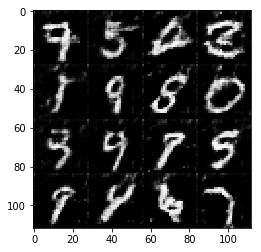

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.35987529158592224 Generative Loss: 3.8236141204833984
Batch No.: 200 Discriminator Loss: 0.3888012766838074 Generative Loss: 3.21419358253479
Epoch 43/100 Discriminator Loss: 0.4916916787624359 Generative Loss: 3.235023260116577


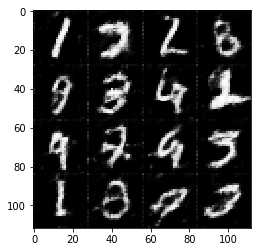

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.42265960574150085 Generative Loss: 5.088796615600586
Batch No.: 200 Discriminator Loss: 0.37395811080932617 Generative Loss: 3.342411994934082
Epoch 44/100 Discriminator Loss: 0.43102842569351196 Generative Loss: 2.93711519241333


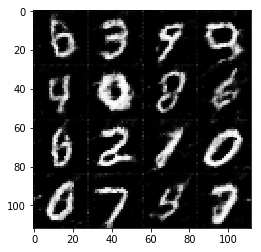

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.356224924325943 Generative Loss: 4.357714653015137
Batch No.: 200 Discriminator Loss: 0.5900190472602844 Generative Loss: 4.499671936035156
Epoch 45/100 Discriminator Loss: 0.35573020577430725 Generative Loss: 4.059294700622559


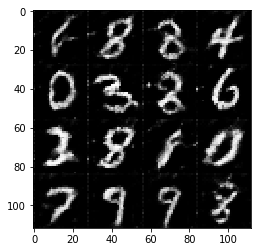

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3712286949157715 Generative Loss: 3.595529556274414
Batch No.: 200 Discriminator Loss: 0.6727626919746399 Generative Loss: 1.6663131713867188
Epoch 46/100 Discriminator Loss: 0.4051160514354706 Generative Loss: 2.851520538330078


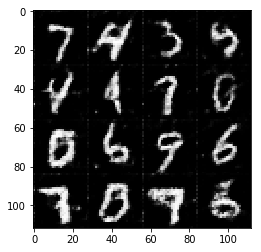

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4694254696369171 Generative Loss: 2.7057547569274902
Batch No.: 200 Discriminator Loss: 0.47043508291244507 Generative Loss: 2.6626245975494385
Epoch 47/100 Discriminator Loss: 0.4277571439743042 Generative Loss: 2.5438547134399414


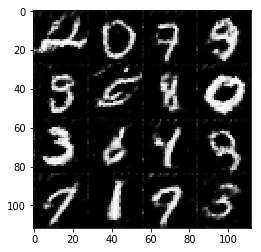

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3687497675418854 Generative Loss: 3.7075929641723633
Batch No.: 200 Discriminator Loss: 0.4047909080982208 Generative Loss: 3.227372169494629
Epoch 48/100 Discriminator Loss: 0.37242400646209717 Generative Loss: 3.603543519973755


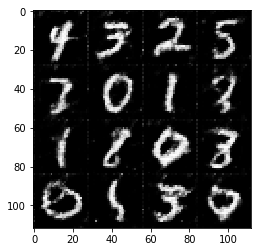

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.5134738087654114 Generative Loss: 1.9832167625427246
Batch No.: 200 Discriminator Loss: 0.34559765458106995 Generative Loss: 4.512096881866455
Epoch 49/100 Discriminator Loss: 0.3890805244445801 Generative Loss: 3.1694135665893555


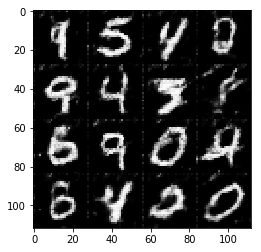

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.35896241664886475 Generative Loss: 3.8481574058532715
Batch No.: 200 Discriminator Loss: 0.3873375654220581 Generative Loss: 3.532517433166504
Epoch 50/100 Discriminator Loss: 0.44401830434799194 Generative Loss: 2.5992817878723145


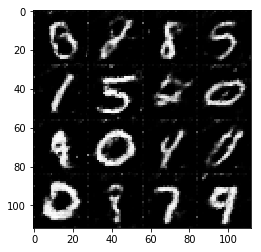

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.37096408009529114 Generative Loss: 3.4876086711883545
Batch No.: 200 Discriminator Loss: 0.384937584400177 Generative Loss: 3.2867653369903564
Epoch 51/100 Discriminator Loss: 0.4725886881351471 Generative Loss: 2.1495249271392822


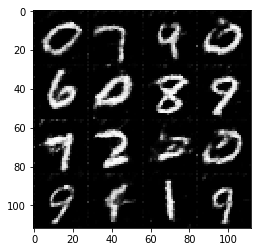

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.36851581931114197 Generative Loss: 3.905308961868286
Batch No.: 200 Discriminator Loss: 0.5113625526428223 Generative Loss: 2.6251883506774902
Epoch 52/100 Discriminator Loss: 0.4602457284927368 Generative Loss: 2.2762291431427


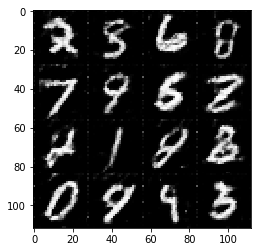

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.38019895553588867 Generative Loss: 3.2175095081329346
Batch No.: 200 Discriminator Loss: 0.47738364338874817 Generative Loss: 2.411665678024292
Epoch 53/100 Discriminator Loss: 0.3914065361022949 Generative Loss: 4.998018264770508


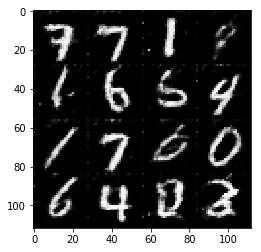

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.39978620409965515 Generative Loss: 4.86505651473999
Batch No.: 200 Discriminator Loss: 0.4203973710536957 Generative Loss: 3.2146997451782227
Epoch 54/100 Discriminator Loss: 0.4145945608615875 Generative Loss: 3.3708224296569824


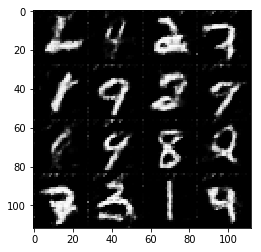

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3914050757884979 Generative Loss: 4.559185028076172
Batch No.: 200 Discriminator Loss: 0.5264294147491455 Generative Loss: 2.1259336471557617
Epoch 55/100 Discriminator Loss: 0.46300429105758667 Generative Loss: 2.3437254428863525


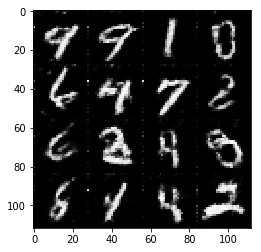

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.47035324573516846 Generative Loss: 2.5756046772003174
Batch No.: 200 Discriminator Loss: 0.35972505807876587 Generative Loss: 3.968595027923584
Epoch 56/100 Discriminator Loss: 0.3930620551109314 Generative Loss: 3.7268567085266113


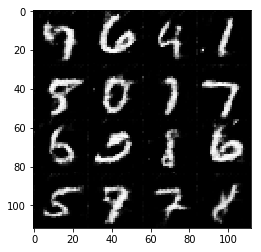

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.37086212635040283 Generative Loss: 3.467613458633423
Batch No.: 200 Discriminator Loss: 0.38130322098731995 Generative Loss: 3.3727633953094482
Epoch 57/100 Discriminator Loss: 0.44785651564598083 Generative Loss: 5.126119613647461


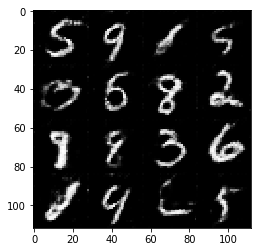

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3657512366771698 Generative Loss: 4.255014419555664
Batch No.: 200 Discriminator Loss: 0.3998569846153259 Generative Loss: 3.031201124191284
Epoch 58/100 Discriminator Loss: 0.39199501276016235 Generative Loss: 6.39809513092041


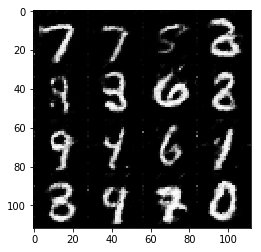

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.43961161375045776 Generative Loss: 2.855531692504883
Batch No.: 200 Discriminator Loss: 0.462652325630188 Generative Loss: 2.2255892753601074
Epoch 59/100 Discriminator Loss: 0.36379003524780273 Generative Loss: 3.96842885017395


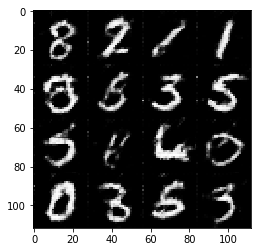

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3747009336948395 Generative Loss: 4.091741561889648
Batch No.: 200 Discriminator Loss: 0.36644306778907776 Generative Loss: 3.5496647357940674
Epoch 60/100 Discriminator Loss: 0.3986019194126129 Generative Loss: 5.020637512207031


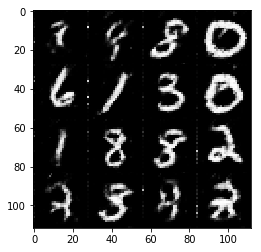

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.44575953483581543 Generative Loss: 2.3799617290496826
Batch No.: 200 Discriminator Loss: 0.44178804755210876 Generative Loss: 2.524402379989624
Epoch 61/100 Discriminator Loss: 0.3669540584087372 Generative Loss: 3.7253308296203613


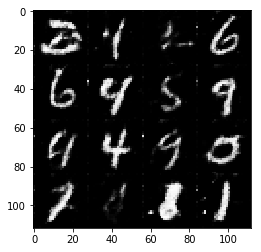

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.43694525957107544 Generative Loss: 2.515866756439209
Batch No.: 200 Discriminator Loss: 0.4147816002368927 Generative Loss: 2.9804270267486572
Epoch 62/100 Discriminator Loss: 0.4066479206085205 Generative Loss: 3.309556484222412


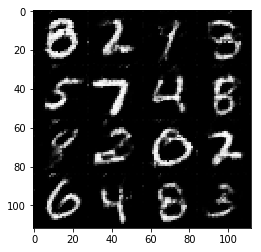

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4581037163734436 Generative Loss: 2.7026612758636475
Batch No.: 200 Discriminator Loss: 0.4889097511768341 Generative Loss: 2.2831177711486816
Epoch 63/100 Discriminator Loss: 0.39127403497695923 Generative Loss: 3.2616069316864014


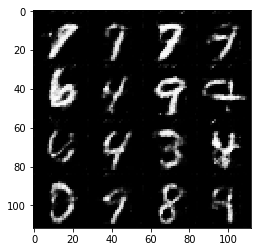

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.37140294909477234 Generative Loss: 3.7092509269714355
Batch No.: 200 Discriminator Loss: 0.396472305059433 Generative Loss: 4.552218914031982
Epoch 64/100 Discriminator Loss: 0.38578057289123535 Generative Loss: 3.240238904953003


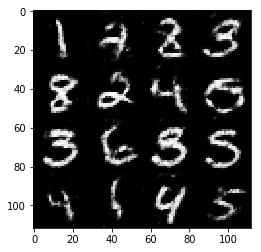

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4483533501625061 Generative Loss: 2.3406829833984375
Batch No.: 200 Discriminator Loss: 0.37424200773239136 Generative Loss: 3.3982737064361572
Epoch 65/100 Discriminator Loss: 0.479941189289093 Generative Loss: 2.2801477909088135


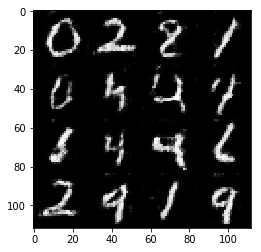

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4829564094543457 Generative Loss: 2.2374234199523926
Batch No.: 200 Discriminator Loss: 0.5511747002601624 Generative Loss: 1.9234120845794678
Epoch 66/100 Discriminator Loss: 0.48576122522354126 Generative Loss: 2.252986192703247


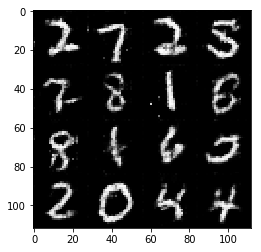

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3793400526046753 Generative Loss: 4.082914352416992
Batch No.: 200 Discriminator Loss: 0.47755277156829834 Generative Loss: 2.6220157146453857
Epoch 67/100 Discriminator Loss: 0.4997214674949646 Generative Loss: 2.038194179534912


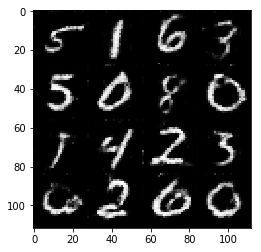

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.37350115180015564 Generative Loss: 3.6811814308166504
Batch No.: 200 Discriminator Loss: 0.4234274625778198 Generative Loss: 2.943789482116699
Epoch 68/100 Discriminator Loss: 0.36004915833473206 Generative Loss: 4.145850658416748


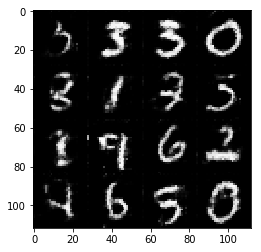

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.37696027755737305 Generative Loss: 3.423757314682007
Batch No.: 200 Discriminator Loss: 0.3622369170188904 Generative Loss: 4.647974491119385
Epoch 69/100 Discriminator Loss: 0.3870815634727478 Generative Loss: 3.05985689163208


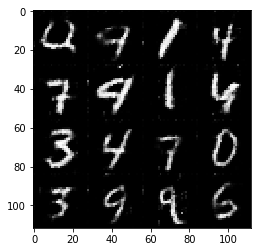

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4328823983669281 Generative Loss: 2.5751707553863525
Batch No.: 200 Discriminator Loss: 0.6063452959060669 Generative Loss: 1.8985244035720825
Epoch 70/100 Discriminator Loss: 0.3742191791534424 Generative Loss: 3.361090660095215


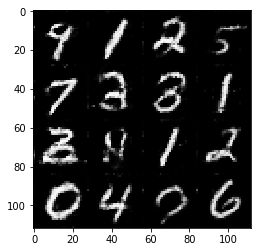

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.35550814867019653 Generative Loss: 4.378096103668213
Batch No.: 200 Discriminator Loss: 0.3974526822566986 Generative Loss: 2.8894145488739014
Epoch 71/100 Discriminator Loss: 0.37646323442459106 Generative Loss: 3.5823721885681152


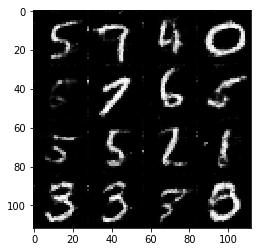

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.38251882791519165 Generative Loss: 4.992404460906982
Batch No.: 200 Discriminator Loss: 0.3910278081893921 Generative Loss: 3.4653239250183105
Epoch 72/100 Discriminator Loss: 0.37935537099838257 Generative Loss: 3.233128547668457


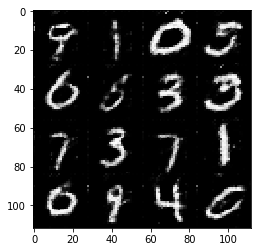

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3750457465648651 Generative Loss: 3.515275716781616
Batch No.: 200 Discriminator Loss: 0.35511431097984314 Generative Loss: 4.30133581161499
Epoch 73/100 Discriminator Loss: 0.3803420960903168 Generative Loss: 3.2279138565063477


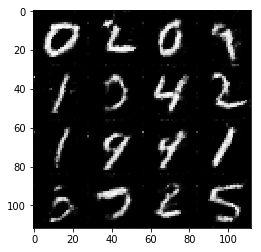

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.37843140959739685 Generative Loss: 4.0317511558532715
Batch No.: 200 Discriminator Loss: 0.41654595732688904 Generative Loss: 2.91568922996521
Epoch 74/100 Discriminator Loss: 0.4039437770843506 Generative Loss: 2.845367670059204


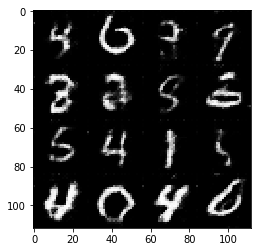

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3917511999607086 Generative Loss: 2.9908220767974854
Batch No.: 200 Discriminator Loss: 0.45213451981544495 Generative Loss: 2.3709592819213867
Epoch 75/100 Discriminator Loss: 0.3817691206932068 Generative Loss: 3.2680604457855225


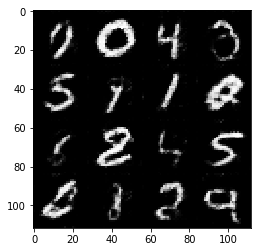

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3678855895996094 Generative Loss: 3.665698766708374
Batch No.: 200 Discriminator Loss: 0.4840928912162781 Generative Loss: 2.365269184112549
Epoch 76/100 Discriminator Loss: 0.44043034315109253 Generative Loss: 2.5156171321868896


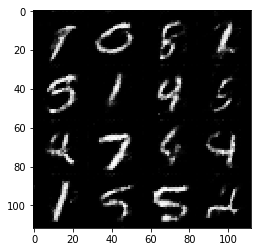

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.5429593324661255 Generative Loss: 1.815138578414917
Batch No.: 200 Discriminator Loss: 0.3576434850692749 Generative Loss: 4.289667129516602
Epoch 77/100 Discriminator Loss: 0.5487333536148071 Generative Loss: 1.946359395980835


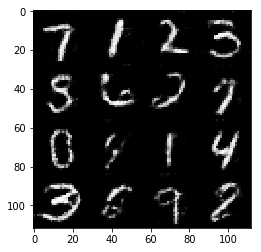

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.5177233219146729 Generative Loss: 2.1549994945526123
Batch No.: 200 Discriminator Loss: 0.461028516292572 Generative Loss: 2.353844165802002
Epoch 78/100 Discriminator Loss: 0.5676844716072083 Generative Loss: 1.7443827390670776


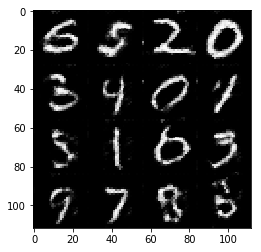

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3798936605453491 Generative Loss: 3.3297336101531982
Batch No.: 200 Discriminator Loss: 0.4941958487033844 Generative Loss: 4.6044511795043945
Epoch 79/100 Discriminator Loss: 0.485078901052475 Generative Loss: 3.62382435798645


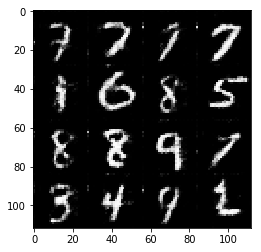

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3560704290866852 Generative Loss: 4.320011138916016
Batch No.: 200 Discriminator Loss: 0.3662094175815582 Generative Loss: 3.616347551345825
Epoch 80/100 Discriminator Loss: 0.3556177616119385 Generative Loss: 4.6869611740112305


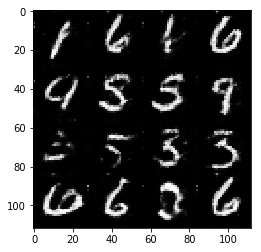

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.375657856464386 Generative Loss: 4.258922576904297
Batch No.: 200 Discriminator Loss: 0.3882822096347809 Generative Loss: 3.5034244060516357
Epoch 81/100 Discriminator Loss: 0.4078720211982727 Generative Loss: 4.293670654296875


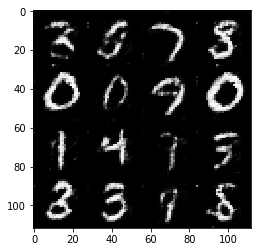

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.33877065777778625 Generative Loss: 5.33280611038208
Batch No.: 200 Discriminator Loss: 0.36079829931259155 Generative Loss: 4.916690349578857
Epoch 82/100 Discriminator Loss: 0.4287932217121124 Generative Loss: 5.083381652832031


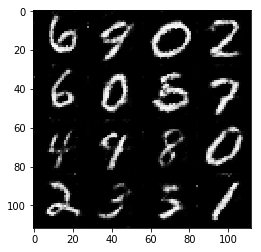

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.37105676531791687 Generative Loss: 4.893344402313232
Batch No.: 200 Discriminator Loss: 0.43172329664230347 Generative Loss: 4.540326118469238
Epoch 83/100 Discriminator Loss: 0.3841762840747833 Generative Loss: 4.687803745269775


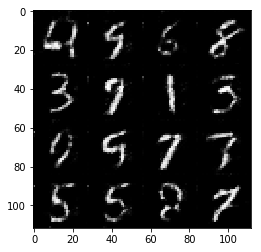

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.33811262249946594 Generative Loss: 5.285477161407471
Batch No.: 200 Discriminator Loss: 0.3665442168712616 Generative Loss: 3.519310712814331
Epoch 84/100 Discriminator Loss: 0.3755011260509491 Generative Loss: 5.6141767501831055


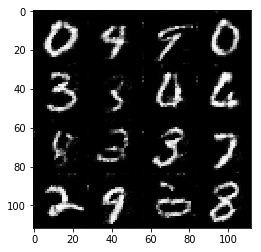

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.36018627882003784 Generative Loss: 3.7810213565826416
Batch No.: 200 Discriminator Loss: 0.4235086441040039 Generative Loss: 4.157390117645264
Epoch 85/100 Discriminator Loss: 0.5326931476593018 Generative Loss: 2.615962266921997


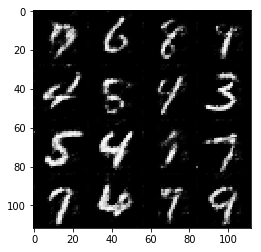

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.39074140787124634 Generative Loss: 3.030829668045044
Batch No.: 200 Discriminator Loss: 0.42796623706817627 Generative Loss: 2.601083517074585
Epoch 86/100 Discriminator Loss: 0.34432199597358704 Generative Loss: 4.641053199768066


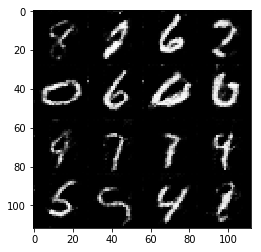

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3585931360721588 Generative Loss: 4.669726371765137
Batch No.: 200 Discriminator Loss: 0.382351815700531 Generative Loss: 3.133464813232422
Epoch 87/100 Discriminator Loss: 0.3495965301990509 Generative Loss: 5.240013122558594


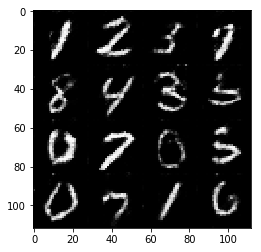

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.36076611280441284 Generative Loss: 4.2053728103637695
Batch No.: 200 Discriminator Loss: 0.41916993260383606 Generative Loss: 2.7634968757629395
Epoch 88/100 Discriminator Loss: 0.3512842655181885 Generative Loss: 5.431852340698242


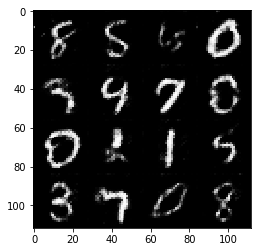

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3653976321220398 Generative Loss: 4.598639965057373
Batch No.: 200 Discriminator Loss: 0.43750882148742676 Generative Loss: 3.7460546493530273
Epoch 89/100 Discriminator Loss: 0.47410860657691956 Generative Loss: 6.31584358215332


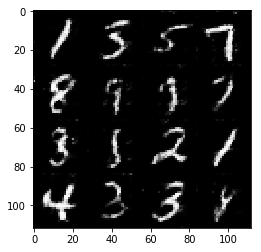

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.38003748655319214 Generative Loss: 3.597048044204712
Batch No.: 200 Discriminator Loss: 0.3700995147228241 Generative Loss: 4.973562240600586
Epoch 90/100 Discriminator Loss: 0.368135929107666 Generative Loss: 4.236501693725586


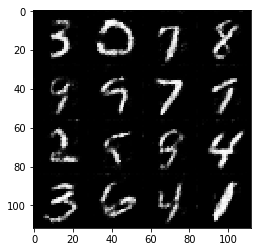

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.39592432975769043 Generative Loss: 6.147398471832275
Batch No.: 200 Discriminator Loss: 0.3818332850933075 Generative Loss: 4.019346237182617
Epoch 91/100 Discriminator Loss: 0.35000139474868774 Generative Loss: 4.793120384216309


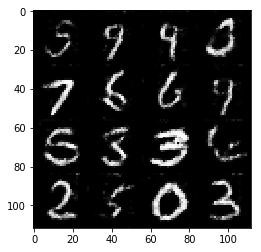

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.3547321557998657 Generative Loss: 3.9190285205841064
Batch No.: 200 Discriminator Loss: 0.619602620601654 Generative Loss: 1.6274651288986206
Epoch 92/100 Discriminator Loss: 0.3504350185394287 Generative Loss: 4.646938323974609


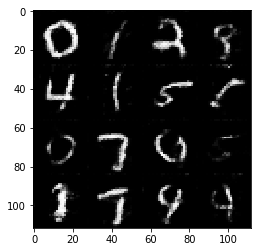

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.37318867444992065 Generative Loss: 3.500676393508911
Batch No.: 200 Discriminator Loss: 0.41106662154197693 Generative Loss: 4.635368824005127
Epoch 93/100 Discriminator Loss: 0.35901519656181335 Generative Loss: 5.963352680206299


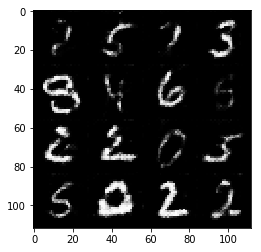

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.39190778136253357 Generative Loss: 3.3449270725250244
Batch No.: 200 Discriminator Loss: 0.6430239677429199 Generative Loss: 1.865387201309204
Epoch 94/100 Discriminator Loss: 0.3701499104499817 Generative Loss: 4.180932998657227


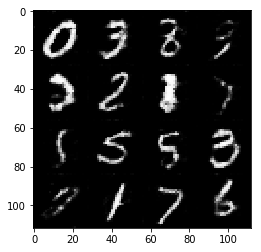

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.40390250086784363 Generative Loss: 5.220868110656738
Batch No.: 200 Discriminator Loss: 0.9005815982818604 Generative Loss: 1.0256388187408447
Epoch 95/100 Discriminator Loss: 0.410552978515625 Generative Loss: 3.02026104927063


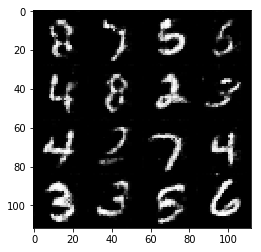

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4024074077606201 Generative Loss: 2.836963176727295
Batch No.: 200 Discriminator Loss: 0.39373084902763367 Generative Loss: 4.4751410484313965
Epoch 96/100 Discriminator Loss: 0.4522472620010376 Generative Loss: 3.2471470832824707


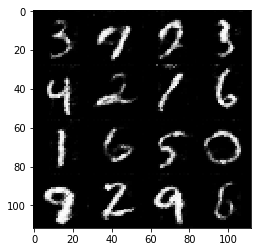

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4449966847896576 Generative Loss: 2.9783525466918945
Batch No.: 200 Discriminator Loss: 0.37040042877197266 Generative Loss: 5.004312038421631
Epoch 97/100 Discriminator Loss: 0.6222585439682007 Generative Loss: 1.9617140293121338


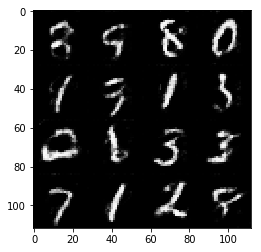

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4285372495651245 Generative Loss: 3.064293384552002
Batch No.: 200 Discriminator Loss: 0.3933459222316742 Generative Loss: 3.0711910724639893
Epoch 98/100 Discriminator Loss: 1.0940206050872803 Generative Loss: 1.0613797903060913


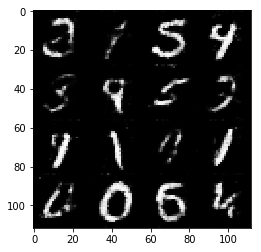

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4166765809059143 Generative Loss: 4.164898872375488
Batch No.: 200 Discriminator Loss: 0.5122721195220947 Generative Loss: 2.035466432571411
Epoch 99/100 Discriminator Loss: 0.42269816994667053 Generative Loss: 3.8518002033233643


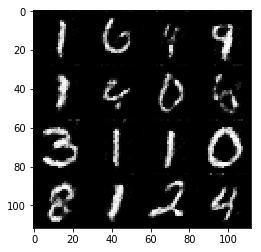

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4089505076408386 Generative Loss: 2.7109053134918213
Batch No.: 200 Discriminator Loss: 0.47583335638046265 Generative Loss: 2.1825709342956543
Epoch 100/100 Discriminator Loss: 0.35521525144577026 Generative Loss: 4.08290958404541


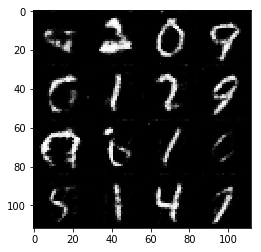

Model saved in path: /tmp/model.ckpt


In [12]:
"""
batch_size = 64
z_dim = 128
learning_rate = 0.002
beta1 = 0.9
"""
"""
batch_size = 128
z_dim = 256
learning_rate = 0.0002
beta1 = 0.9
"""
"""
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.9
"""
""" best parameters

batch_size = 256 or 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.9
#alpha=0.025
"""
"""
batch_size = 256
z_dim = 256
learning_rate = 0.001
beta1 = 0.9
"""
""" ALSO GOOD ONE
batch_size = 256
z_dim = 100
learning_rate = 0.005
beta1 = 0.9
"""
batch_size = 256
z_dim = 100
learning_rate = 0.005
beta1 = 0.9
ALPHA=0.03
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 100

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Batch No.: 100 Discriminator Loss: 0.3352058231830597 Generative Loss: 6.277978420257568
Batch No.: 200 Discriminator Loss: 0.33193501830101013 Generative Loss: 6.204267501831055
Batch No.: 300 Discriminator Loss: 0.3303907811641693 Generative Loss: 6.016263961791992
Batch No.: 400 Discriminator Loss: 0.32926130294799805 Generative Loss: 7.015017986297607
Batch No.: 500 Discriminator Loss: 0.33559364080429077 Generative Loss: 5.568866729736328
Batch No.: 600 Discriminator Loss: 0.3315527141094208 Generative Loss: 6.7095465660095215
Batch No.: 700 Discriminator Loss: 0.3298952877521515 Generative Loss: 8.308423042297363
Epoch 1/200 Discriminator Loss: 0.3283024728298187 Generative Loss: 6.948028087615967


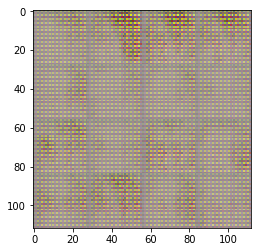

Model saved in path: /tmp/model.ckpt
Batch No.: 100 Discriminator Loss: 0.4277878403663635 Generative Loss: 2.9611079692840576
Batch No.: 200 Discriminator Loss: 0.3398303687572479 Generative Loss: 6.04398775100708
Batch No.: 300 Discriminator Loss: 0.3467796742916107 Generative Loss: 5.001446723937988
Batch No.: 400 Discriminator Loss: 0.3403245806694031 Generative Loss: 5.878180503845215
Batch No.: 500 Discriminator Loss: 0.3493945598602295 Generative Loss: 5.539596080780029
Batch No.: 600 Discriminator Loss: 0.35685449838638306 Generative Loss: 4.857281684875488


In [ ]:
batch_size = 256
z_dim = 512
learning_rate = 0.002
beta1 = 0.9


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 200

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.